In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

Generate points

In [2]:
X = np.random.normal(loc=0.0,scale=1.0,size=40)
X = np.reshape(X,(40,1))
X.shape

(40, 1)

In [3]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='tophat', bandwidth=1).fit(X)

In [4]:
x_sample = np.linspace(-5,5,1000)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
# score_samples needs 2d array input hence rehsape
# outputs log probability - so use np.exp to convert to prob


Plot different bandwidths and compare with gaussian

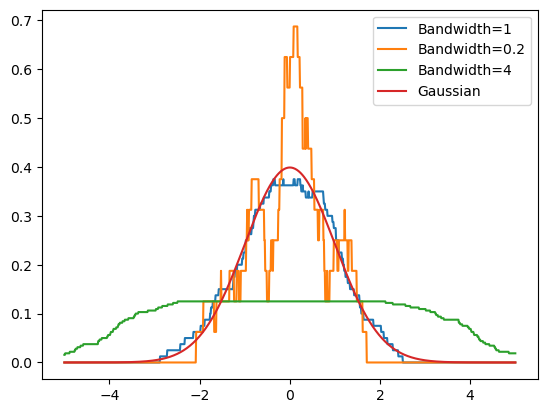

In [5]:
my_kernel = 'tophat'

fig, ax = plt.subplots()
kde = KernelDensity(kernel=my_kernel, bandwidth=1).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
plt.plot(x_sample,p,label='Bandwidth=1')
# now bandwith  = 0.2
kde = KernelDensity(kernel=my_kernel, bandwidth=0.2).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
plt.plot(x_sample,p,label='Bandwidth=0.2')
# now bandwith =4
kde = KernelDensity(kernel=my_kernel, bandwidth=4).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
plt.plot(x_sample,p,label='Bandwidth=4')

# Plot normal_dist
def gaussian(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig) * np.exp(-1/2*((x-mu)/sig)**2)
p = gaussian(x_sample,0,1)
plt.plot(x_sample,p,label='Gaussian')

plt.legend()

Do the same but use a gaussian kernel now instead

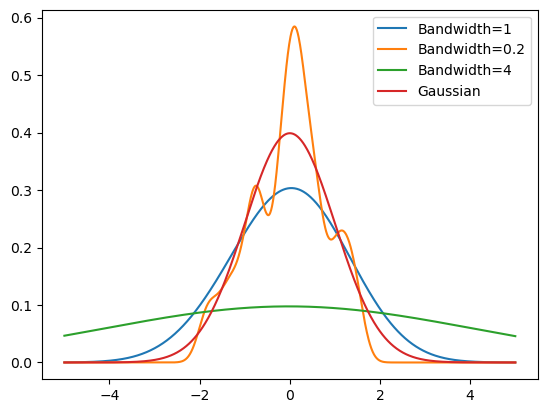

In [6]:
my_kernel = 'gaussian'

fig, ax = plt.subplots()
kde = KernelDensity(kernel=my_kernel, bandwidth=1).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
plt.plot(x_sample,p,label='Bandwidth=1')
# now bandwith  = 0.2
kde = KernelDensity(kernel=my_kernel, bandwidth=0.2).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
plt.plot(x_sample,p,label='Bandwidth=0.2')
# now bandwith =4
kde = KernelDensity(kernel=my_kernel, bandwidth=4).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))
plt.plot(x_sample,p,label='Bandwidth=4')

# Plot normal_dist
def gaussian(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig) * np.exp(-1/2*((x-mu)/sig)**2)
p = gaussian(x_sample,0,1)
plt.plot(x_sample,p,label='Gaussian')

plt.legend()

#### Window Plotting

- Unsure about what its asking for in this part

(-0.25, 0.25)

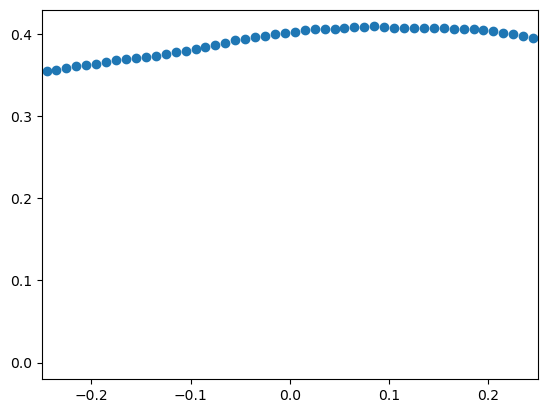

In [7]:
my_kernel = 'exponential'
kde = KernelDensity(kernel=my_kernel, bandwidth=0.5).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample),1)))

plt.scatter(x_sample,p,label='Bandwidth=1, Exponential')
plt.xlim(-0.25,0.25)

### 2D Function Classification

In [8]:
def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

Generate circular distribution

In [9]:
X,y = gen_circular_distribution(200)
X1 = X[y==0,:]
X2 = X[y==1,:]

Create Window Classifiers

In [10]:
def window_classifier(my_kernel,bw,X1,X2,X,y,plot_type):
    kde_0 = KernelDensity(kernel=my_kernel, bandwidth=bw).fit(X1)
    kde_1 = KernelDensity(kernel=my_kernel, bandwidth=bw).fit(X2)
    Xgrid, x1line,x2line = gen_sample_grid(limit=10)

    #Generate grid and sample probability for X1 and X2 across this grid
    p_0 = np.exp(kde_0.score_samples(Xgrid))
    p_1 = np.exp(kde_1.score_samples(Xgrid))
    p_0 = np.reshape(p_0,(len(x1line),len(x2line)) )
    p_1 = np.reshape(p_1,(len(x1line),len(x2line)) )

    fig, ax = plt.subplots()
    
    if plot_type == 0:
        plt.contourf(x1line,x2line,p_0)
        plt.title(f'Bandwith:{bw}, kernel={my_kernel} y = 0')
    
    else:
        plt.contourf(x1line,x2line,p_1)
        plt.title(f'Bandwith:{bw}, kernel={my_kernel} y = 1')

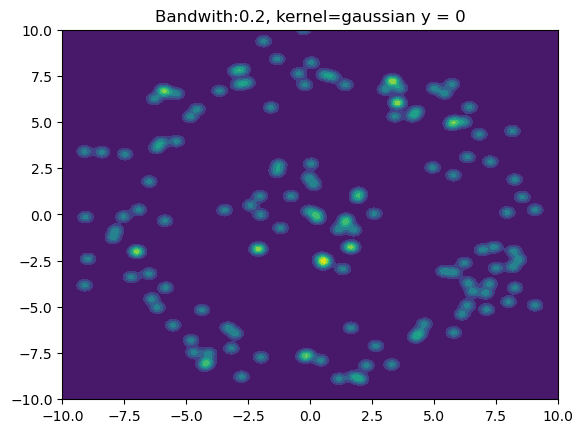

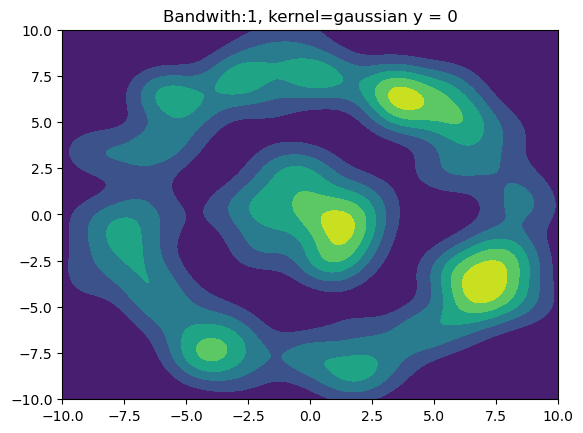

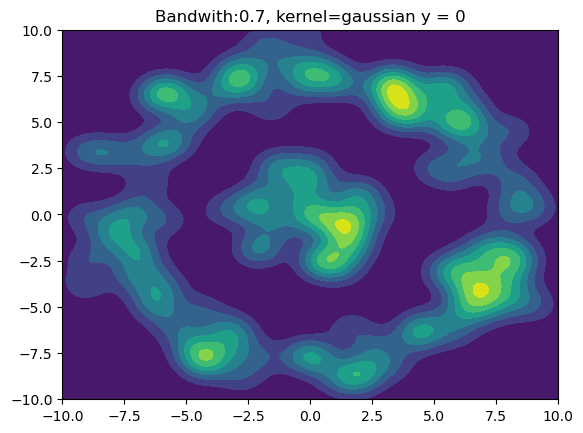

In [11]:
window_classifier('gaussian',0.2,X1,X2,X,y,0)
window_classifier('gaussian',1,X1,X2,X,y,0)
window_classifier('gaussian',0.7,X1,X2,X,y,0)

### Nearest Neighbour Classification

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def KneighborsOnGrid(near):
    neigh = KNeighborsClassifier(n_neighbors=near)
    neigh.fit(X,y)
    y_pred = neigh.predict(Xgrid)
    y_pred = np.reshape(y_pred,(200,200))
    plt.contourf(x1line,x2line,y_pred)
    plt.title('Prediction with n ={}'.format(near))
    plt.show()

In [13]:
KneighborsOnGrid(1)
KneighborsOnGrid(2)
KneighborsOnGrid(3)
KneighborsOnGrid(100)

NameError: name 'Xgrid' is not defined

### Estimate Density Manually
- Do later

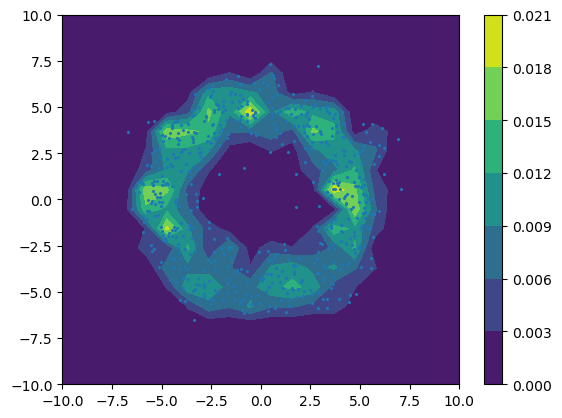

In [16]:
nx = 20
r = 10

gridDim = np.linspace(-r, r, nx)

dx = gridDim[1] - gridDim[0]
minx = np.min(gridDim)


X, y = gen_circular_distribution(2000)

# take single component
Xuse = X[y == 1, :]

#C onvert the continuous values of x and y coordinates in Xuse[:, 0] and Xuse[:, 1] into discrete integers, 
# by subtracting off the minimum and dividing by the spacing, then rounding and converting into integers
Xgrid = (np.round((Xuse[:, 0] - minx) / dx)).astype('int')
Ygrid = (np.round((Xuse[:, 1] - minx) / dx)).astype('int')

# Set up a grid of density values which will contain the final image - set to 0 initially
density = np.zeros([nx, nx])

for i in range(len(Xgrid)):
    # Add 1 to the density for the corresponding cell, identified by the rounding approach above
    density[Xgrid[i], Ygrid[i]] += 1

# Normalise 
totDen = np.sum(density[:])
density /= totDen * dx * dx

# Plot
fig, ax = plt.subplots()
plt.contourf(gridDim, gridDim, density.T)

ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', s=2)
plt.colorbar()
plt.xlim(-r, r)
plt.ylim(-r, r)
plt.show()
